In [2]:
using PyPlot


# Tarea 9 Ejercicios 2-6 Adán Rubiol


Ejercicio 2

In [2]:
function derivada_numerica(f,x)# creamos una función que toma como input la función , el punto a evaluar
list=zeros(100)#se crea una lista de ceros donde se guardará el valor de la derivada
n=1
           for i in 1:100 #este ciclo es para evaluar la derivada 100 veces
              df=(f(x+(1/n))-f(x))*n #se calcula el valor de la derivada
              list[i]=df; #asignamos el valor de la derivada a un elemento de la lista
              n+=1 # se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list #se regresa la lista
end

derivada_numerica (generic function with 1 method)

In [3]:
list1=derivada_numerica(cos,pi/4)#se asigna a un arreglo el valor de las derivadas cuando h tiende tiende a cero

100-element Array{Float64,1}:
 -0.920065
 -0.851135
 -0.810849
 -0.787693
 -0.772877
 -0.762627
 -0.755126
 -0.749403
 -0.744896
 -0.741255
 -0.738252
 -0.735734
 -0.733593
  ⋮       
 -0.711064
 -0.711021
 -0.710978
 -0.710936
 -0.710895
 -0.710855
 -0.710815
 -0.710777
 -0.710739
 -0.710702
 -0.710666
 -0.710631

In [4]:
Y=-sin(pi/4) #el valor real de la derivada,así comparado con el valor obtenido se tiene un resultado muy cercano al real.

-0.7071067811865475

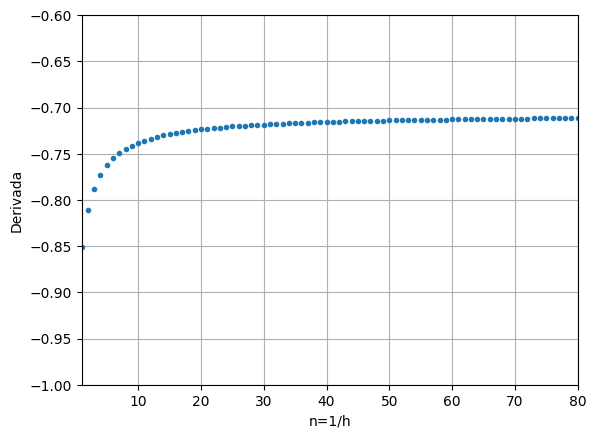

In [5]:
plot(real(list1),".")#se grafica la derivada respecto al numero de la iteración n=1/h
grid("on")
xlabel("n=1/h")
ylabel("Derivada")
ylim(-1,-0.6)
xlim(1,80)
show();

In [4]:
function err(f,x)# la función error tiene como argumentos la función y el punto x
lista=zeros(500)
list=zeros(500)#creamos una lista de ceros para guardar el error

n=1
           for i in 1:500 #en este ciclo calculamos el error para diferentes valores de h
              deltaf=abs(f(x+(1/n))-f(x))*n #se calcula el valor de delta f
              e=(deltaf-sin(pi/4))/sin(pi/4) #calculamos el error para este ejemplo
              list[i]=e#esta lista tiene los valores del error
              lista[i]=1/n#y esta los valores de h=1/n de cada iteración
             
              n+=1#se aumenta el valor de n
        
           end
return list, lista #se regresa los arreglos list y lista
end

err (generic function with 1 method)

In [5]:
err(cos,pi/4) #se aplica la función anterior al mismo ejemplo 


([0.301169, 0.203686, 0.146713, 0.113966, 0.0930138, 0.0785174, 0.0679093, 0.0598165, 0.0534421, 0.0482925  …  0.00101764, 0.00101557, 0.00101351, 0.00101146, 0.00100942, 0.00100739, 0.00100536, 0.00100334, 0.00100133, 0.000999333], [1.0, 0.5, 0.333333, 0.25, 0.2, 0.166667, 0.142857, 0.125, 0.111111, 0.1  …  0.00203666, 0.00203252, 0.0020284, 0.00202429, 0.0020202, 0.00201613, 0.00201207, 0.00200803, 0.00200401, 0.002])

In [6]:
(list3,list4)=err(cos,pi/4)#asignamos las listas obtenidas a list3 y list4

([0.301169, 0.203686, 0.146713, 0.113966, 0.0930138, 0.0785174, 0.0679093, 0.0598165, 0.0534421, 0.0482925  …  0.00101764, 0.00101557, 0.00101351, 0.00101146, 0.00100942, 0.00100739, 0.00100536, 0.00100334, 0.00100133, 0.000999333], [1.0, 0.5, 0.333333, 0.25, 0.2, 0.166667, 0.142857, 0.125, 0.111111, 0.1  …  0.00203666, 0.00203252, 0.0020284, 0.00202429, 0.0020202, 0.00201613, 0.00201207, 0.00200803, 0.00200401, 0.002])

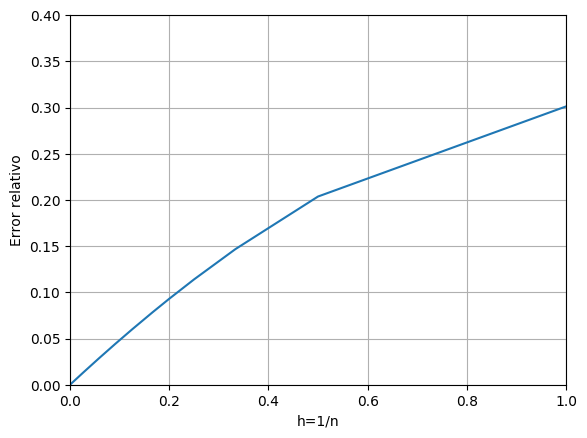

In [9]:
plot(list4,list3)
grid("on")
xlabel("h=1/n")
ylabel("Error relativo")
ylim(0,0.4)
xlim(0,1)
show();#se grafican el error e vs h=1/n y se observa que para valores pequeños de h,i.e x en (0,0.4)  el error es una linea recta, es decir es de orden h.

Ejercicio 3.

Teniendo en mente la serie de Taylor para $f(x+h)$, ¿existe alguna forma de mejorar el cálculo de la derivada numérica?

De las series de Taylor:
 $$ f(x+h)=f(x) + h\frac{df}{dx}+\frac{h^{2}}{2}\frac{d^{2}f}{dx^{2}}+\frac{h^{3}}{3} \frac{d^{3}f}{dx^{3}}+ \mathcal{O}\left(h^{4}\right)$$ 
 $$ f(x-h)=f(x) - h\frac{df}{dx}+\frac{h^{2}}{2}\frac{d^{2}f}{dx^{2}}-\frac{h^{3}}{3} \frac{d^{3}f}{dx^{3}}+ \mathcal{O}\left(h^{4}\right)$$ 

Restamos la segunda se la primera serie se obtiene:
$$f(x+h)-f(x-h)= 2h\frac{df}{dx}+ \frac{2h^{3}}{3} \frac{d^{3}f}{dx^{3}}+ \mathcal{O}\left(h^{5}\right)$$
Si nos quedamos sólo con el primer término entonces:
$$f(x+h)-f(x-h)= 2h\frac{df}{dx}+ \mathcal{O}\left(h^{3}\right)$$
Porlo tanto
$$\frac{f(x+h)-f(x-h)}{2h}-\frac{df}{dx}=\mathcal{O}\left(h^{2}\right)$$
Es decir si tomamos la derivada, eligiendo los puntos simétricos al punto de interes donde se desea obtener la derivada obtendremos un error mas pequeño.

Un manera de construir la derivada numérica sin hacer h arbitrariamente pequeño es tomando mas puntos simétricos al punto donde se desea calcular la derivada.

Ejercicio 4

In [70]:
function derivadasimetrica(f,x,h)# creamos una función que toma como entradas la función , el punto a evaluar,h
              df=(f(x+h)-f(x-h))/2h #se calcula el valor de la derivada
        
return df #se regresa la derivada
end

derivadasimetrica (generic function with 2 methods)

In [71]:
derivadasimetrica(cos,pi/4,0.001)

-0.7071066633353995

In [74]:
#se implementa la derivda simétrica.
function derivada_simetrica(f,x)# creamos una función que toma como entradas la función , el punto a evaluar
list=zeros(100)#creamos una lista de ceros donde se guardará el valor de la derivada
n=1
           for i in 1:100 #este ciclo es para evaluar la derivada 100 veces
              df=(f(x+(1/n))-f(x-(1/n)))*n/2 #se calcula el valor de la derivada
              list[i]=df; #asignamos el valor de la derivada a un valor de la lista
              n+=1 # se aumenta el valor de n en cada iteración,aqui h=1/n
           end
return list #se regresa la lista
end

derivada_simetrica (generic function with 1 method)

In [77]:
list5=derivada_simetrica(cos,pi/4)#se asigna a un arreglo el valor de las derivadas cuando h tiende tiende a cero

100-element Array{Float64,1}:
 -0.59501 
 -0.67801 
 -0.694085
 -0.699764
 -0.702402
 -0.703838
 -0.704704
 -0.705267
 -0.705653
 -0.705929
 -0.706133
 -0.706289
 -0.70641 
  ⋮       
 -0.707092
 -0.707092
 -0.707093
 -0.707093
 -0.707093
 -0.707093
 -0.707094
 -0.707094
 -0.707094
 -0.707095
 -0.707095
 -0.707095

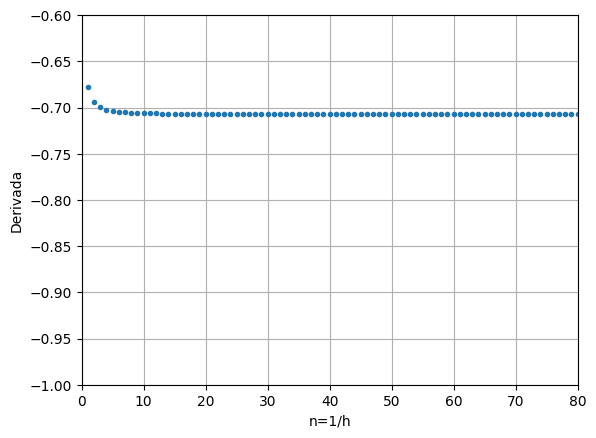

In [116]:
plot(real(list5),".")#se grafica la derivada respecto al numero de la iteración n=1/h, notamos que converge mas rápido que la derivada hacia adelante
grid("on")
xlabel("n=1/h")
ylabel("Derivada")
ylim(-1,-0.6)
xlim(0,80)
show();

In [3]:
function error(f,x)# la función error tiene como argumentos la función y el punto x
listx=zeros(100)
listy=zeros(100)#creamos una lista de ceros para guardar el error

n=1
           for i in 1:100 #en este ciclo calculamos el error para diferentes valores de h
              deltaf=abs(f(x+(1/n))-f(x-(1/n)))*n/2 #se calcula el valor de delta f
              e=abs((deltaf-sin(pi/4))/sin(pi/4))
        #calculamos el error para este ejemplo
              listy[i]=e#esta lista tiene los valores del error
              listx[i]=1/n#y esta los valores de h=1/n de cada iteración
             
              n+=1#se aumenta el valor de n
        
           end
return listx, listy #se regresa los arreglos list y lista
end

error (generic function with 1 method)

In [105]:
(listx,listy)=error(cos,pi/4)

([1.0, 0.5, 0.333333, 0.25, 0.2, 0.166667, 0.142857, 0.125, 0.111111, 0.1  …  0.010989, 0.0108696, 0.0107527, 0.0106383, 0.0105263, 0.0104167, 0.0103093, 0.0102041, 0.010101, 0.01], [0.158529, 0.0411489, 0.0184159, 0.0103842, 0.00665335, 0.0046232, 0.00339789, 0.00260213, 0.00205634, 0.00166583  …  2.01263e-5, 1.96911e-5, 1.92699e-5, 1.88621e-5, 1.84671e-5, 1.80844e-5, 1.77134e-5, 1.73538e-5, 1.7005e-5, 1.66666e-5])

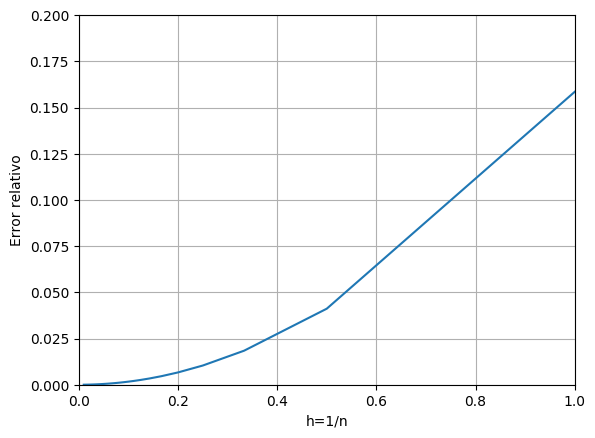

In [125]:
plot(listx,listy)
grid("on")
xlabel("h=1/n")
ylabel("Error relativo")
ylim(0,0.2)
xlim(0,1)
show();#se grafican el error e vs h=1/n y se observa que para valores pequeños de h el error es una parábola como se esperaba,es decir el error es de orden h al cudrado.

In [107]:
listx

100-element Array{Float64,1}:
 1.0      
 0.5      
 0.333333 
 0.25     
 0.2      
 0.166667 
 0.142857 
 0.125    
 0.111111 
 0.1      
 0.0909091
 0.0833333
 0.0769231
 ⋮        
 0.011236 
 0.0111111
 0.010989 
 0.0108696
 0.0107527
 0.0106383
 0.0105263
 0.0104167
 0.0103093
 0.0102041
 0.010101 
 0.01     

Ejercico 5.


Demuestre que $\Delta_h$ es un operador lineal:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$
Ya que se definio el operador $\Delta_h$ como:
$$\Delta_h:f \mapsto f(x+h)-f(x)=\Delta f(x,h).$$

Veamos que el operador abre las sumas y saca los escalares i.e:

$$\Delta_h(af(x)+bg(x))=af(x+h)+bg(x+h)-(af(x)+bg(x))$$
$$=a(f(x+h)-f(x))+b(g(x+h)-g(x))$$
$$=a\Delta_hf(x)+b\Delta_hg(x)$$

Ejercicio 6.


Ver como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia  adelante_

Consideremos la serie de Taylor:


$$e^{\eta}=\sum_{n=0}^{\infty} \frac{\eta^n}{n!}= \sum_{n=1}^{\infty}  \frac{\eta^n}{n!}+ 1$$


$$\Rightarrow e^{\eta}-1=\sum_{n=1}^{\infty} \frac{\eta^n}{n!}$$

Si elegimos  a $\eta$ como:

$$\eta=\left.h\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$$

Entonces
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}=e^{\eta}-1=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$


Con $\Delta_h$ el operador de diferencia finita hacia adelante y $\frac{d^n}{d\xi^n}$ la derivada exacta.